In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
pd.set_option("display.max_rows", 80)
pd.set_option("display.max_columns", 80)

In [3]:
#read data
df = pd.read_csv("data/parkinsons.csv")

In [4]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
df.shape

(195, 24)

In [6]:
#check for any None values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
#check for duplicate rows
df.duplicated().value_counts()

False    195
dtype: int64

In [8]:
#check status column if it's binary
df["status"].unique()

array([1, 0])

In [9]:
#set index as "name"
df.set_index("name", inplace=True)

In [10]:
colms = ["MDVP:Shimmer", "MDVP:Shimmer(dB)", "PPE"]

<AxesSubplot:>

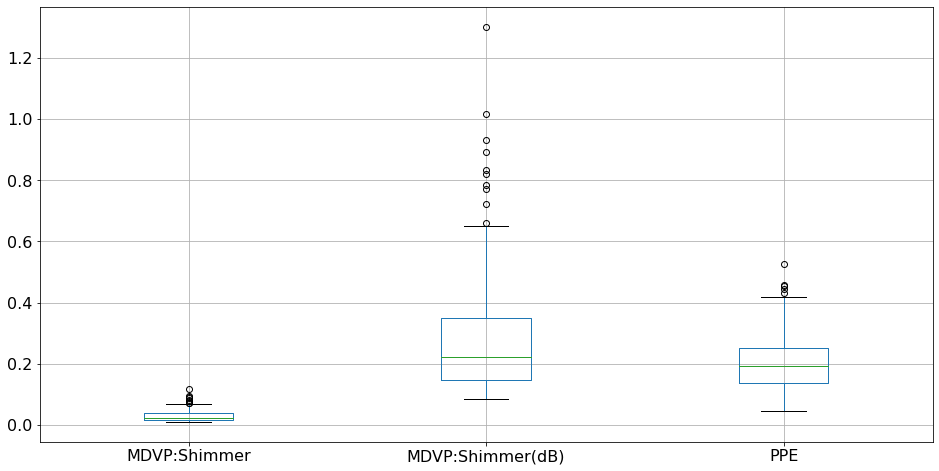

In [11]:
#outliers are the values that are away from the box
df.boxplot(column=colms, figsize=(16, 8), fontsize=16)

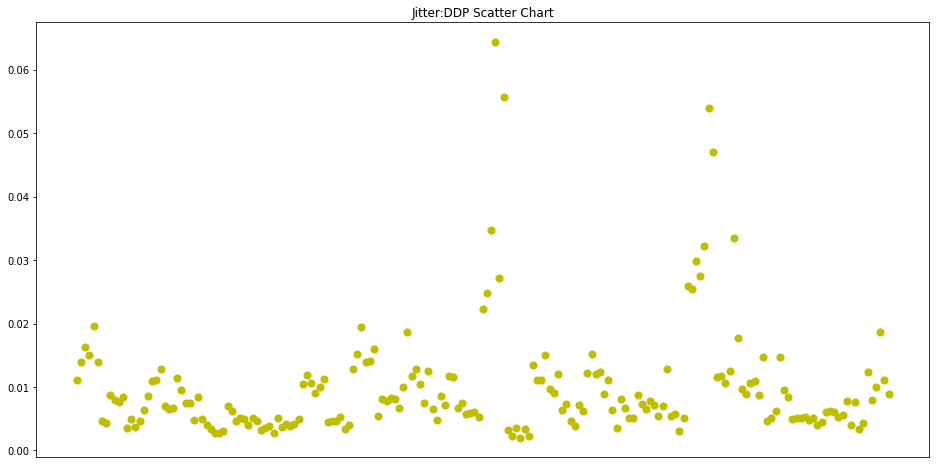

In [12]:
#scatter plot for displaying outliers
plt.figure(figsize=(16,8))
plt.scatter(list(df.index), df["Jitter:DDP"], c="y", s=50)
plt.title("Jitter:DDP Scatter Chart")
plt.xticks([])
plt.show()

In [13]:
#find outliners
abs_z_score = np.abs(stats.zscore(df)) #get absolute z score
filt = (abs_z_score < 3).all(axis=1) #filter where abs_z_score is smaller than 3
df = df[filt] #remove outliners
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


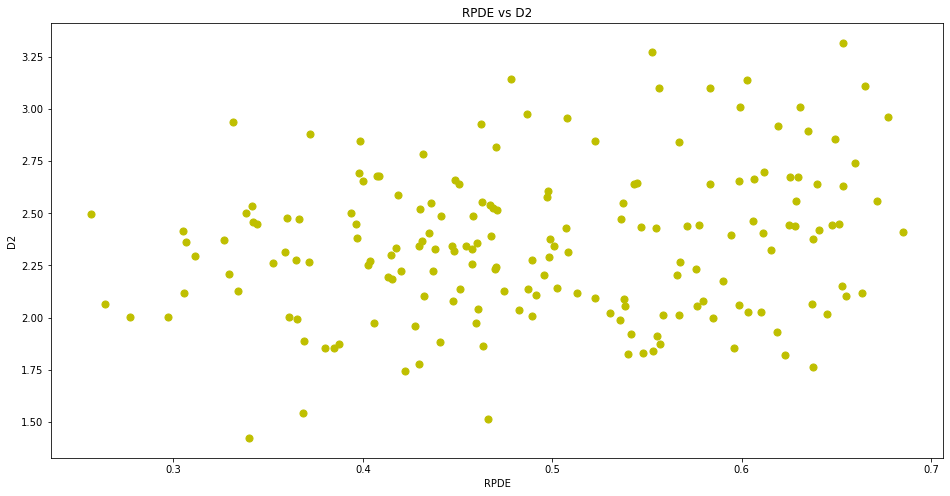

In [14]:
#correlation between RPDE and D2
plt.figure(figsize=(16,8))
plt.scatter(df["RPDE"], df["D2"], color="y", s=50)
plt.title("RPDE vs D2")
plt.xlabel("RPDE")
plt.ylabel("D2")
plt.show()

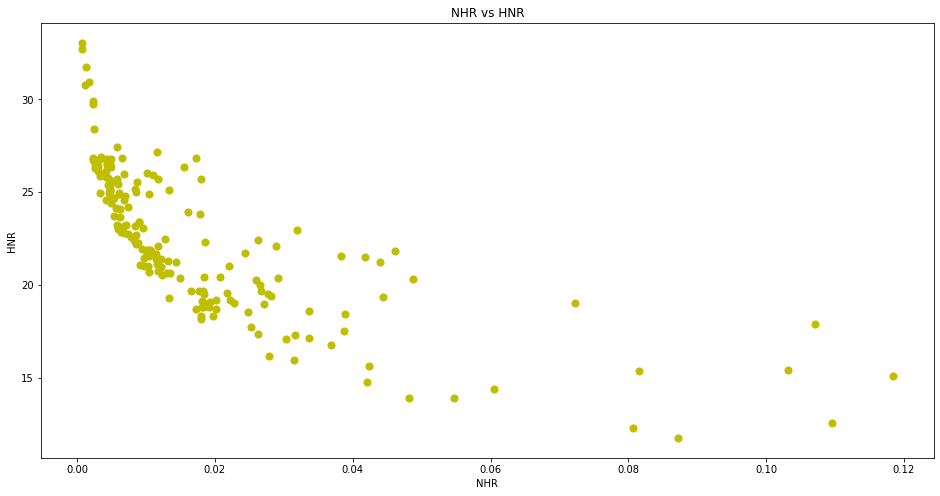

In [15]:
#correlation between NHR and HNR
plt.figure(figsize=(16,8))
plt.scatter(df["NHR"], df["HNR"], color="y", s=50)
plt.title("NHR vs HNR")
plt.xlabel("NHR")
plt.ylabel("HNR")
plt.show()

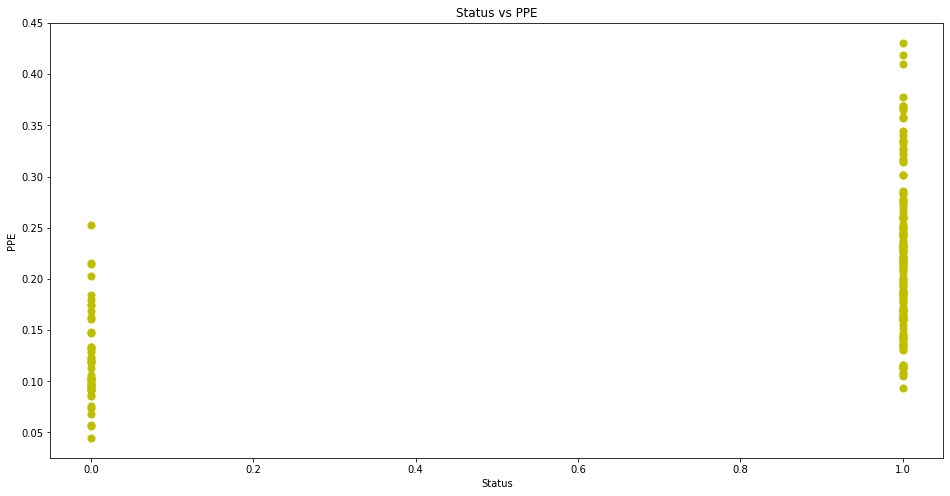

In [16]:
#correlation between Status and Shimmer:DDA
plt.figure(figsize=(16,8))
plt.scatter(df["status"], df["PPE"], color="y", s=50)
plt.title("Status vs PPE")
plt.xlabel("Status")
plt.ylabel("PPE")
plt.show()

In [17]:
#pairwise correlation between each column. Higher correlation means both attribute behaves similarly 
#while lower correlation means opposite.
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.714783,0.585996,-0.239872,-0.565208,-0.165800,-0.250934,-0.165863,-0.182234,-0.172920,-0.160556,-0.156241,-0.201166,-0.160579,-0.049571,0.112500,-0.419793,-0.392915,-0.515281,-0.500816,-0.304852,0.162211,-0.479673
MDVP:Fhi(Hz),0.714783,1.000000,0.212441,-0.088162,-0.348179,-0.082794,-0.122340,-0.082883,-0.138057,-0.113599,-0.137330,-0.122378,-0.128309,-0.137364,0.072232,0.032922,-0.231924,-0.197976,-0.497880,-0.231088,-0.043591,0.252176,-0.223036
MDVP:Flo(Hz),0.585996,0.212441,1.000000,-0.326796,-0.445311,-0.264680,-0.266525,-0.264689,-0.275843,-0.269825,-0.261642,-0.227201,-0.288422,-0.261632,-0.278741,0.319173,-0.417493,-0.430923,-0.106437,-0.498078,-0.313645,-0.169843,-0.457354
MDVP:Jitter(%),-0.239872,-0.088162,-0.326796,1.000000,0.897788,0.976147,0.960151,0.976165,0.617560,0.665638,0.580329,0.600601,0.643526,0.580324,0.761398,-0.678431,0.314180,0.354365,0.228613,0.666869,0.357180,0.344008,0.699707
MDVP:Jitter(Abs),-0.565208,-0.348179,-0.445311,0.897788,1.000000,0.852486,0.884269,0.852518,0.562436,0.592369,0.532114,0.545681,0.562726,0.532125,0.600978,-0.573750,0.388631,0.448475,0.374590,0.741936,0.392793,0.175917,0.770175
MDVP:RAP,-0.165800,-0.082794,-0.264680,0.976147,0.852486,1.000000,0.934786,0.999999,0.610330,0.655556,0.581222,0.588814,0.626400,0.581210,0.767612,-0.682393,0.308013,0.324205,0.189231,0.601413,0.266309,0.347098,0.625869
MDVP:PPQ,-0.250934,-0.122340,-0.266525,0.960151,0.884269,0.934786,1.000000,0.934801,0.655651,0.703744,0.610888,0.677234,0.672882,0.610891,0.671131,-0.664027,0.323617,0.313843,0.333124,0.693831,0.363347,0.299406,0.753065
Jitter:DDP,-0.165863,-0.082883,-0.264689,0.976165,0.852518,0.999999,0.934801,1.000000,0.610304,0.655522,0.581202,0.588806,0.626386,0.581190,0.767652,-0.682403,0.308042,0.324133,0.189162,0.601506,0.266286,0.347106,0.625969
MDVP:Shimmer,-0.182234,-0.138057,-0.275843,0.617560,0.562436,0.610330,0.655651,0.610304,1.000000,0.985599,0.986748,0.981222,0.953641,0.986749,0.589645,-0.784880,0.378893,0.440120,0.191459,0.558631,0.390744,0.426419,0.586912
MDVP:Shimmer(dB),-0.172920,-0.113599,-0.269825,0.665638,0.592369,0.655556,0.703744,0.655522,0.985599,1.000000,0.962414,0.969478,0.957226,0.962416,0.623121,-0.781910,0.367201,0.410917,0.195797,0.557021,0.391539,0.427541,0.586647


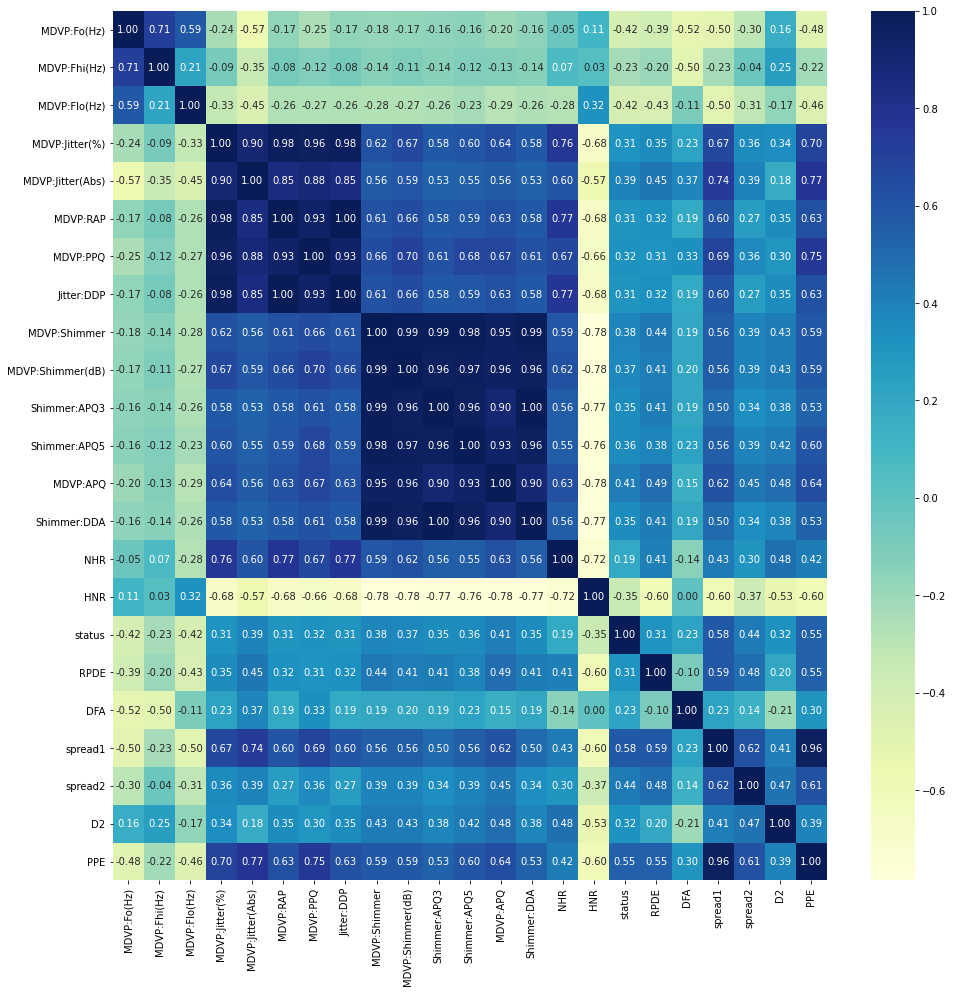

In [18]:
#seaborn heatmap by dfcorr() Darker color means positive correlation while lighter color means negative correlation
plt.figure(figsize=(16,16))
#df.corr() = pairwise correlation, fmt = str formatting, annot = fill rect
sns.heatmap(df.corr(), fmt='.2f', annot=True, cmap="YlGnBu");

In [19]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,154.676630,183.737436,116.235254,0.005457,0.000039,0.002839,0.003034,0.008516,0.027603,0.258298,0.014602,0.016667,0.022114,0.043807,0.018116,22.310497,0.745856,0.493856,0.718806,-5.786743,0.221630,2.349643,0.198168
std,41.982512,60.865252,43.971398,0.002959,0.000024,0.001730,0.001769,0.005187,0.015240,0.150077,0.008382,0.009944,0.012561,0.025146,0.020653,3.919846,0.436586,0.104362,0.055225,1.003159,0.081040,0.355373,0.080944
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,11.744000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.274000,133.374000,83.961000,0.003390,0.000020,0.001650,0.001840,0.004960,0.016420,0.145000,0.008120,0.009560,0.013010,0.024360,0.005780,19.517000,0.000000,0.417356,0.676066,-6.486822,0.173319,2.080121,0.134120
50%,149.689000,166.607000,104.315000,0.004760,0.000030,0.002370,0.002580,0.007100,0.022930,0.210000,0.012680,0.013410,0.017710,0.038040,0.010700,22.244000,1.000000,0.487407,0.722356,-5.783272,0.212294,2.344336,0.188180
75%,183.520000,217.455000,135.041000,0.006940,0.000050,0.003680,0.003750,0.011050,0.035270,0.334000,0.018060,0.019940,0.028090,0.054170,0.021830,25.197000,1.000000,0.583390,0.761255,-5.198864,0.266892,2.555477,0.244512
max,260.105000,450.247000,239.170000,0.018720,0.000120,0.010750,0.011540,0.032250,0.079590,0.784000,0.044210,0.049620,0.068240,0.132620,0.118430,33.047000,1.000000,0.685151,0.825288,-2.929379,0.434326,3.317586,0.430788


In [20]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
# X: features, y:target
X = df.drop(columns=["status"])
y = df["status"]

In [22]:
# scale the data with StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipe = make_pipeline(StandardScaler(), svm.SVC(kernel="linear"))
pipe.fit(X_train, y_train)
accuracy = pipe.score(X_test, y_test)

In [23]:
accuracy

0.8918918918918919